In [7]:
import matplotlib.pyplot as plt
import utils

# Load raw data

raw_data = utils.load_data("/home/tototmek/Studia/Magisterka/code/bee_counter_firmware/data/experiments/2025-07-26/2025-07-26_11-04-07.csv")
channels = ['delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7']

print(raw_data.head())

     time  delta0  delta1  delta2  delta3  delta4  delta5  delta6  delta7
0  194583       6      -3      41     -40      67     -25      17      -7
1  194593       6      -4      41     -40      61     -27      15     -19
2  194603       6      -4      41     -39      68     -25      16     -15
3  194613       6      -4      41     -40      68     -26      16     -12
4  194623       6      -3      41     -41      68     -25      17     -17


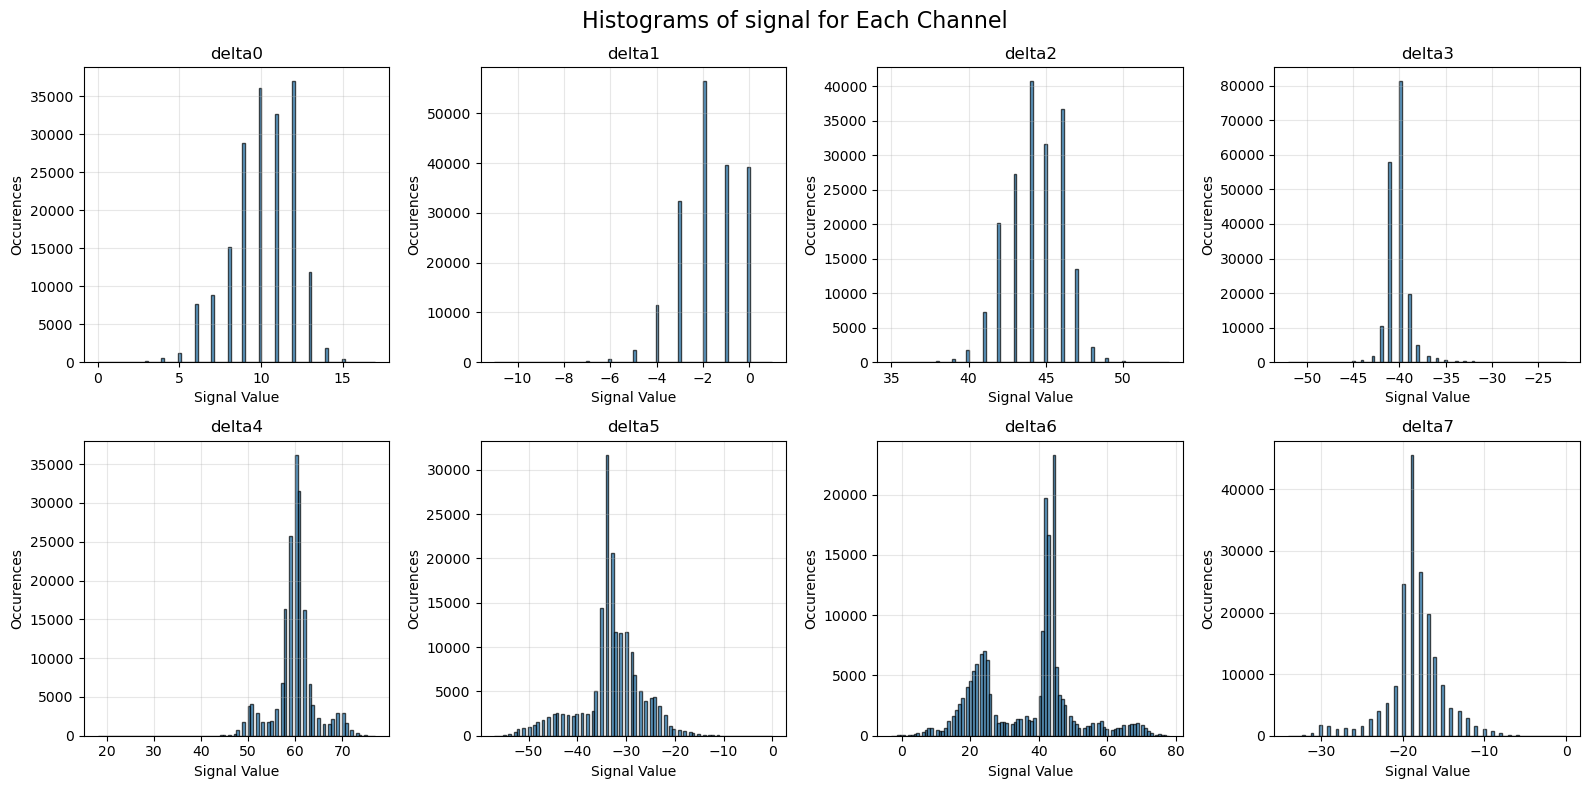

In [8]:
# Create a figure with subplots for all channels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Histograms of signal for Each Channel', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, channel in enumerate(channels):
    axes[i].hist(raw_data[channel], bins=100, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{channel}')
    axes[i].set_xlabel('Signal Value')
    axes[i].set_ylabel('Occurences')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


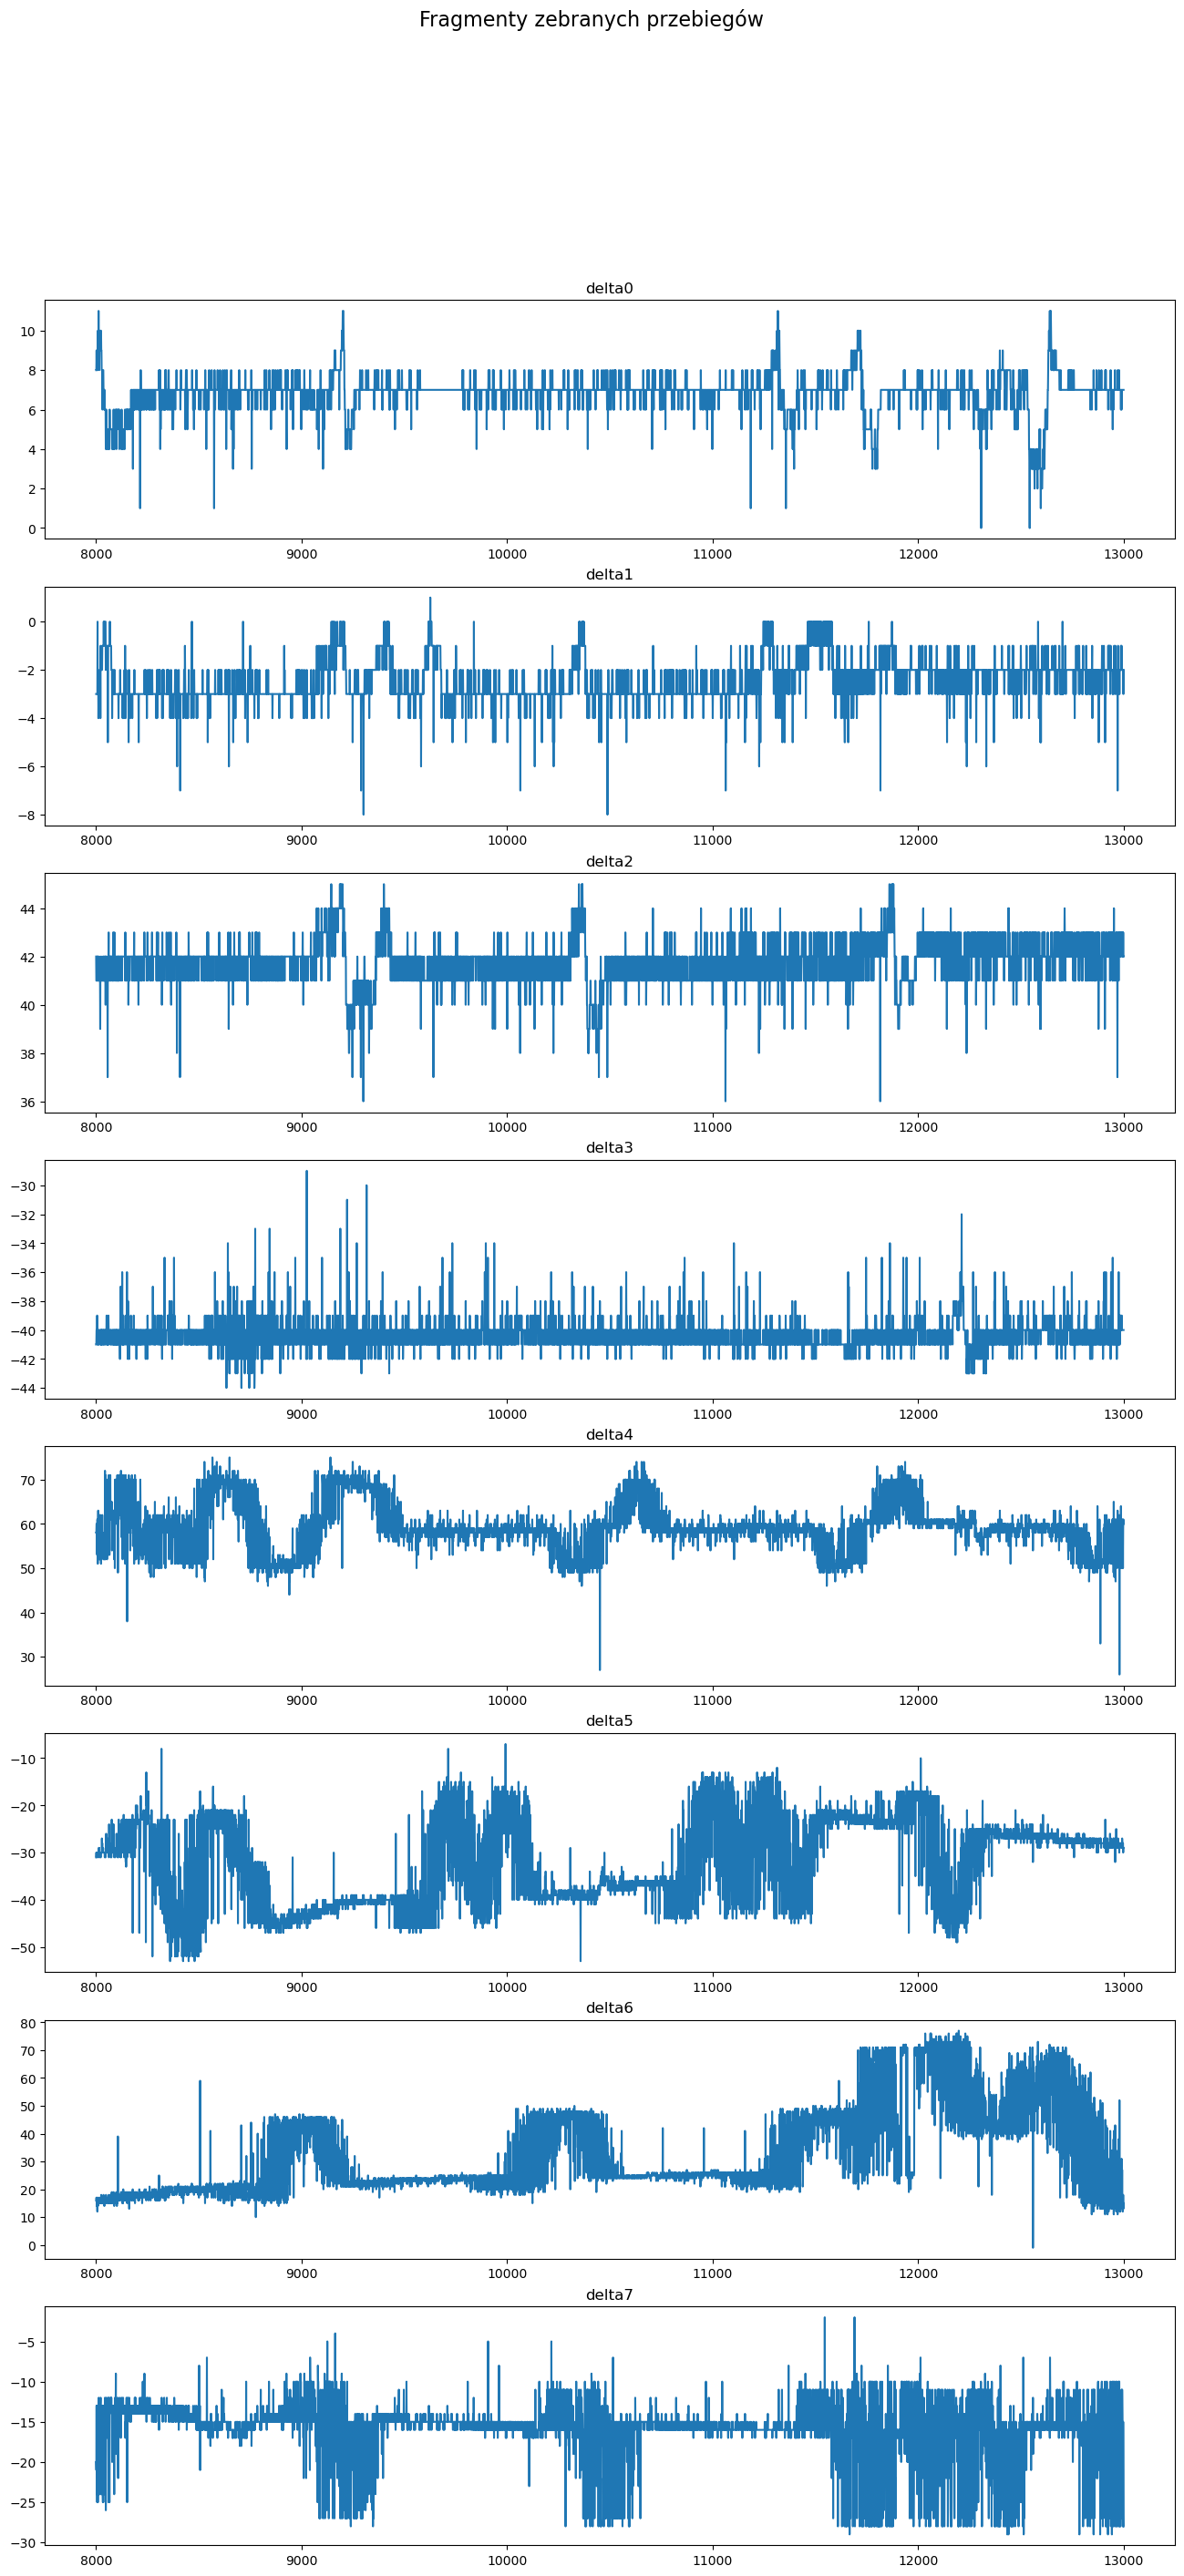

In [9]:
# Plot short fragments of all channels in one figure

range_length = 5000
start_indices = [8000] * 8

# Plot short fragments of all channels in one figure

fig, axes = plt.subplots(8, 1, figsize=(16, 32))
axes = axes.flatten()
fig.suptitle('Fragmenty zebranych przebiegów', fontsize=16)

for i, channel in enumerate(channels):
    axes[i].plot(raw_data[channel][start_indices[i]:start_indices[i] + range_length])
    axes[i].set_title(f'{channel}')

In [12]:
avg_filtered_data = raw_data.copy()

for channel in channels:
    avg_filtered_data[channel] = raw_data[channel].rolling(window=30).mean()

print(avg_filtered_data.head(100))

      time  delta0  delta1  delta2     delta3     delta4     delta5  \
0   194583     NaN     NaN     NaN        NaN        NaN        NaN   
1   194593     NaN     NaN     NaN        NaN        NaN        NaN   
2   194603     NaN     NaN     NaN        NaN        NaN        NaN   
3   194613     NaN     NaN     NaN        NaN        NaN        NaN   
4   194623     NaN     NaN     NaN        NaN        NaN        NaN   
..     ...     ...     ...     ...        ...        ...        ...   
95  195533     6.0    -4.0    40.9 -39.733333  63.266667 -23.566667   
96  195543     6.0    -4.0    40.9 -39.700000  63.233333 -23.766667   
97  195553     6.0    -4.0    40.9 -39.700000  63.066667 -23.733333   
98  195563     6.0    -4.0    40.9 -39.700000  62.866667 -23.600000   
99  195573     6.0    -4.0    40.9 -39.700000  62.533333 -23.400000   

       delta6     delta7  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         Na

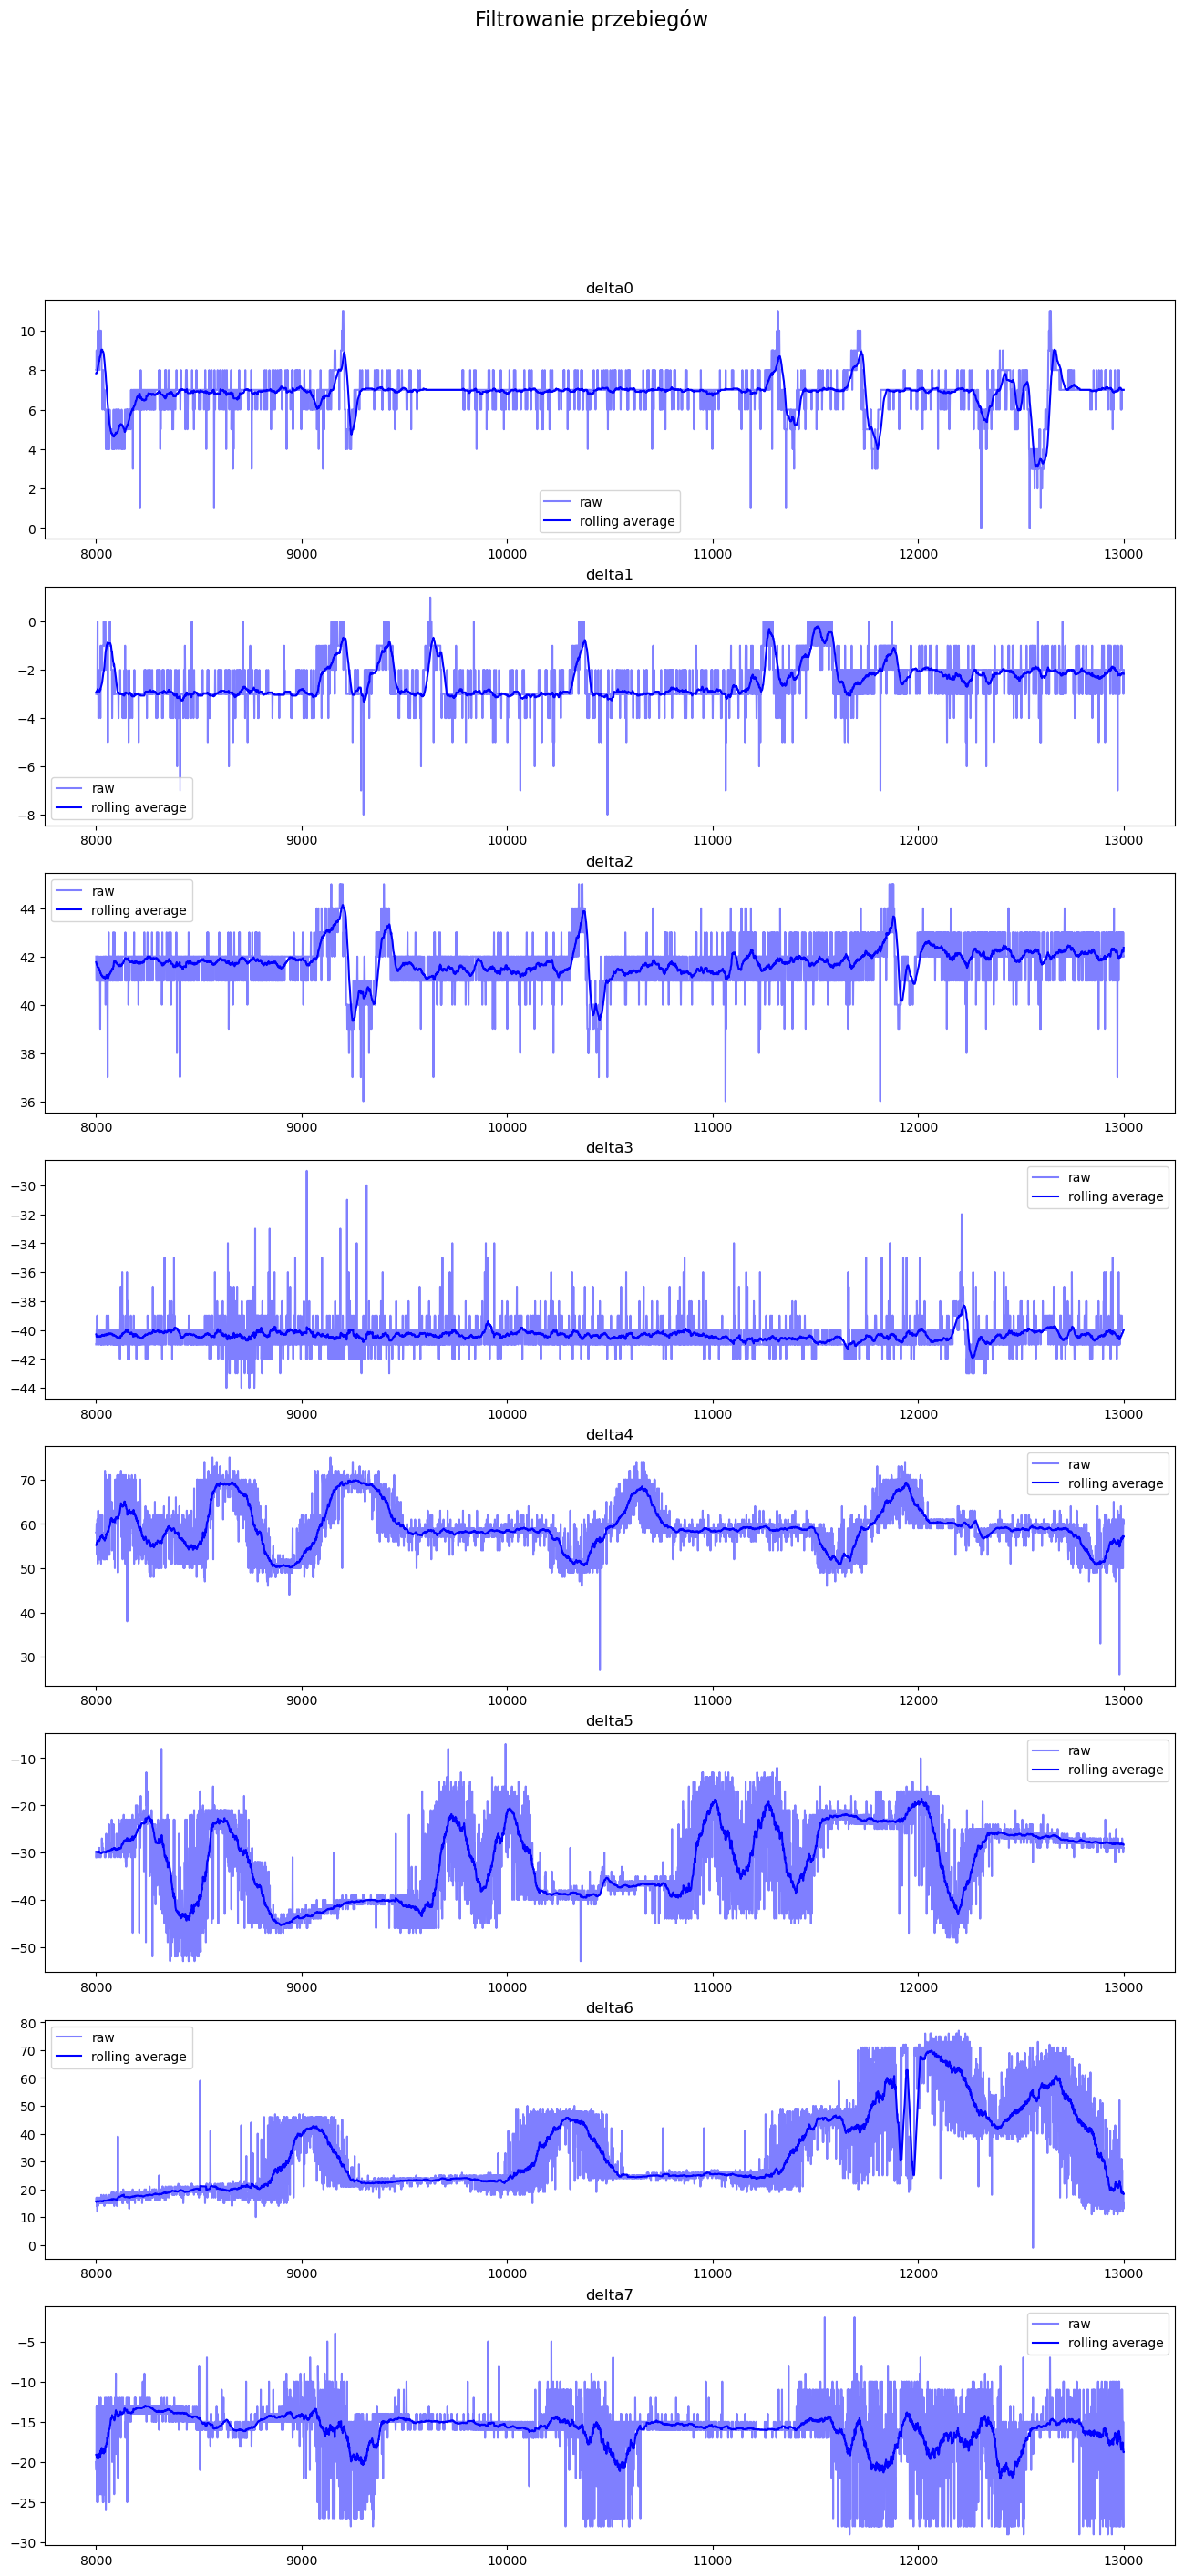

In [13]:
fig, axes = plt.subplots(8, 1, figsize=(16, 32))
axes = axes.flatten()
fig.suptitle('Filtrowanie przebiegów', fontsize=16)

for i, channel in enumerate(channels):
    axes[i].plot(raw_data[channel][start_indices[i]:start_indices[i] + range_length], label='raw', alpha=0.5, color='blue')
    axes[i].plot(avg_filtered_data[channel][start_indices[i]:start_indices[i] + range_length], label='rolling average', color='blue')
    axes[i].legend()
    axes[i].set_title(f'{channel}')